In [2]:
def solve1():
    for x1 in [1, 2]:
        for x2 in [1, 2]:
            if x1 != x2:
                for x3 in [1, 2, 3]:
                    if x1 != x3 and x2 != x3 and 3*x1 + x2 + x3 == 10:
                        print(x1, x2, x3)

solve1()

2 1 3


In [5]:
def convert(word, d):
    num = 0
    for ch in word:
        num = num*10 + d[ch]
    return num

In [6]:
import itertools

def solve(words):
    chars = list(set(''.join(words)))
    n = len(chars)
    for perm in itertools.permutations(range(10), n):
        d = dict(zip(chars, perm))
        numbers = [convert(word, d) for word in words]
        if sum(numbers[:-1]) == numbers[-1]:
            print(numbers, d)

solve(['SEND', 'MORE', 'MONEY'])

[9567, 1085, 10652] {'O': 0, 'Y': 2, 'R': 8, 'M': 1, 'E': 5, 'N': 6, 'S': 9, 'D': 7}
[2817, 368, 3185] {'O': 3, 'Y': 5, 'R': 6, 'M': 0, 'E': 8, 'N': 1, 'S': 2, 'D': 7}
[2819, 368, 3187] {'O': 3, 'Y': 7, 'R': 6, 'M': 0, 'E': 8, 'N': 1, 'S': 2, 'D': 9}
[3719, 457, 4176] {'O': 4, 'Y': 6, 'R': 5, 'M': 0, 'E': 7, 'N': 1, 'S': 3, 'D': 9}
[3829, 458, 4287] {'O': 4, 'Y': 7, 'R': 5, 'M': 0, 'E': 8, 'N': 2, 'S': 3, 'D': 9}
[3712, 467, 4179] {'O': 4, 'Y': 9, 'R': 6, 'M': 0, 'E': 7, 'N': 1, 'S': 3, 'D': 2}
[3821, 468, 4289] {'O': 4, 'Y': 9, 'R': 6, 'M': 0, 'E': 8, 'N': 2, 'S': 3, 'D': 1}
[5849, 638, 6487] {'O': 6, 'Y': 7, 'R': 3, 'M': 0, 'E': 8, 'N': 4, 'S': 5, 'D': 9}
[5731, 647, 6378] {'O': 6, 'Y': 8, 'R': 4, 'M': 0, 'E': 7, 'N': 3, 'S': 5, 'D': 1}
[5732, 647, 6379] {'O': 6, 'Y': 9, 'R': 4, 'M': 0, 'E': 7, 'N': 3, 'S': 5, 'D': 2}
[6853, 728, 7581] {'O': 7, 'Y': 1, 'R': 2, 'M': 0, 'E': 8, 'N': 5, 'S': 6, 'D': 3}
[6419, 724, 7143] {'O': 7, 'Y': 3, 'R': 2, 'M': 0, 'E': 4, 'N': 1, 'S': 6, 'D': 9}
[6

In [7]:
!python -m pip install -U ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [8]:
from ortools.sat.python import cp_model

$$
3x_1 + x_2 + x_3 = 10
$$

$$
x_1, x_2 \in \{1, 2\}, x_3 \in \{1, 2, 3\}
$$

In [10]:
model = cp_model.CpModel()

x1 = model.NewIntVar(1, 2, 'x1')
x2 = model.NewIntVar(1, 2, 'x2')
x3 = model.NewIntVar(1, 3, 'x3')

model.Add(3*x1 + x2 + x3 == 10)
model.AddAllDifferent([x1, x2, x3])

solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
    print(solver.Value(x1), solver.Value(x2), solver.Value(x3))

2 1 3


In [11]:
import numpy as np
import matplotlib.pyplot as plt

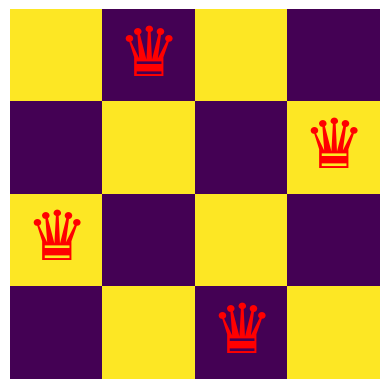

In [17]:
def showBoard(b):
    n = len(b)
    board = np.zeros((n, n), dtype=int)
    board[::2, ::2] = 1
    board[1::2, 1::2] = 1

    plt.imshow(board)
    for row, col in enumerate(b):
        plt.text(col, row, u'\u265b', ha='center', va='center',
                 color='red', size=200/n)
    plt.axis('off')
    plt.show()

showBoard([1, 3, 0, 2])

In [37]:
def nqueens(n):
    model = cp_model.CpModel()
    variables = [model.NewIntVar(0, n-1, f'x{i}') for i in range(n)]
    model.AddAllDifferent(variables)
    model.AddAllDifferent(variables[i] + i for i in range(n))
    model.AddAllDifferent(variables[i] - i for i in range(n))

    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    if status == cp_model.OPTIMAL:
        showBoard([solver.Value(var) for var in variables])
    else:
        print('No solution')

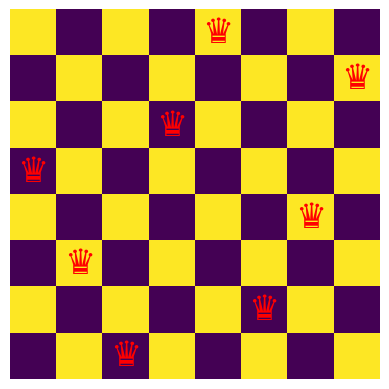

In [39]:
nqueens(8)

In [46]:
def toNumber(values, word):
    result = 0
    for ch in word:
        result = result*10 + values[ch]
    return result

In [55]:
def solve2(words):
    chars = list(set(''.join(words)))
    n = len(chars)
    model = cp_model.CpModel()
    values = { ch: model.NewIntVar(0, 9, f'x{ch}') for ch in chars}
    model.AddAllDifferent([value for value in values.values()])
    leftside = 0
    for i in range(len(words) - 1):
        leftside = leftside + toNumber(values, words[i])
    rightside = toNumber(values, words[-1])
    model.add(leftside == rightside)

    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    if status == cp_model.OPTIMAL:
        print({ch: solver.Value(values[ch]) for ch in chars})
    else:
        print('No solution')

solve2(['his', 'hey', 'yapd', 'hell'])

{'l': 5, 'y': 1, 'i': 3, 'h': 2, 'e': 4, 'p': 7, 's': 6, 'd': 8, 'a': 9}


In [ ]:
# {'O': 0, 'Y': 2, 'R': 8, 'M': 1, 'E': 5, 'N': 6, 'S': 9, 'D': 7}